# M1 and M2 test

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import pims
import trackpy as tp

Using matplotlib backend: Qt5Agg


# Getting the M1 and M2 data

In [2]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

framesM1 = pims.as_grey(pims.open('M1 to cathode.tif.crdownload.tif'))
framesM2 = pims.as_grey(pims.open('M2 to anode.tif'))

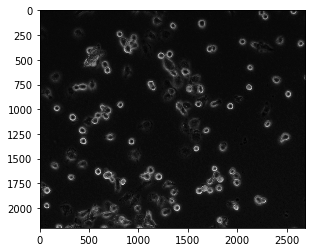

In [3]:
plt.imshow(framesM1[0])

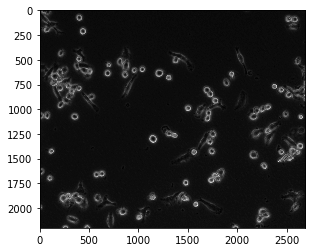

In [4]:
plt.imshow(framesM2[0])

# Locating/Defining Features
Redefining parameters to eliminate spurious features.
Again, avoiding groups and false positives (mass optimization)

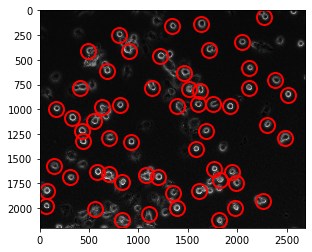

In [5]:
# (frames, size, mass)
fM1 = tp.locate(framesM1[0], 103, 105000)
tp.annotate(fM1,framesM1[0])

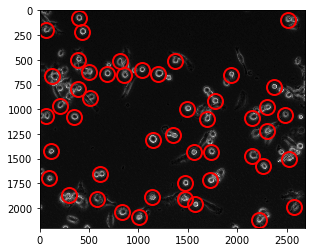

In [6]:
# (frames, size, mass)
fM2 = tp.locate(framesM2[0], 103, 105000)
tp.annotate(fM2,framesM2[0])

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Mass')]

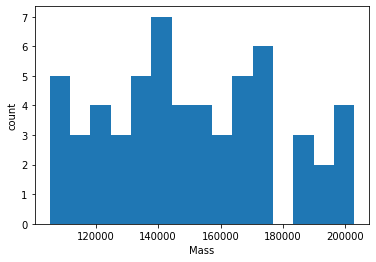

In [7]:
# now dealing with false positives (due to fleeting peaks in brightness)
# we will me looking at the total brightness (mass)
fig, ax = plt.subplots()

ax.hist(fM1['mass'], bins=15)
ax.set(xlabel='Mass', ylabel = 'count')

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Mass')]

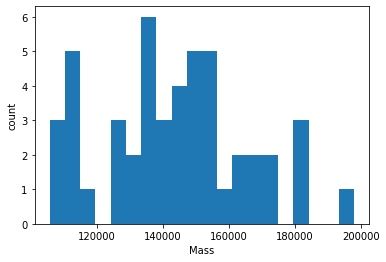

In [8]:
fig, ax = plt.subplots()

ax.hist(fM2['mass'], bins=20)
ax.set(xlabel='Mass', ylabel = 'count')

In [9]:
# now finding features on all frames of M1
tp.quiet()
fM1 = tp.batch(framesM1[:], 103, minmass=80000)

In [10]:
# now finding features on all frames of M2
fM2 = tp.batch(framesM2[:], 113, minmass=105000)

# Linking features into particle trajectory

In [11]:
t1 = tp.link(fM1, 30, memory = 3)
t1.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,67.996313,2271.672659,123140.412683,29.537323,0.189178,87.864169,361345.0,0.011629,0,0
35,1288.682295,2480.447539,165326.807048,35.766646,0.169209,119.592897,466930.0,0.008190,0,1
36,1286.573936,705.397112,136419.495408,30.721298,0.131931,100.067526,397792.0,0.010156,0,2
37,1324.176773,436.992234,197599.194331,31.353567,0.088179,134.236925,475117.0,0.008006,0,3
38,1330.753493,923.224930,168879.204219,28.334537,0.094587,139.118268,416606.0,0.009533,0,4


In [12]:
t2 = tp.link(fM2, 30, memory = 3)
t2.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,78.318678,396.401521,160766.417023,27.988141,0.019959,107.245367,395675.0,0.010657,0,0
28,1261.039965,1349.398037,205240.821369,30.389468,0.195761,117.221680,535388.0,0.007071,0,1
29,1250.462779,2184.039365,126667.378428,37.808108,0.032520,82.928104,422182.0,0.009721,0,2
30,1305.596890,1144.254321,237788.543258,36.332256,0.073878,133.433189,556356.0,0.006731,0,3
31,1426.325654,113.940603,153598.435973,22.863086,0.118014,116.598161,381210.0,0.011247,0,4


In [13]:
# trackpy.filtering.filter_stubs(tracks, threshold=100)

# tracksDataFrame must include columns named ‘frame’ and ‘particle’
# thresholdinteger, default 100; minimum number of points (video frames) to survive

tM1 = tp.filter_stubs(t1, 20)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t1['particle'].nunique())
print('After:', tM1['particle'].nunique())

Before: 502
After: 49


In [14]:
tM2 = tp.filter_stubs(t2, 20)
print('Before:', t2['particle'].nunique())
print('After:', tM2['particle'].nunique())

Before: 225
After: 34


# Analysing Trajectories (Plotting Tools)
Testing scatter, plot_displacements, subpx_bias, mass_ecc <br> Based on given parameters (5 min/frame, 4.31 pix/um) <br><br>  API Reference: http://soft-matter.github.io/trackpy/v0.5.0/api.html

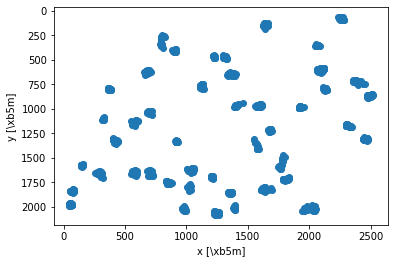

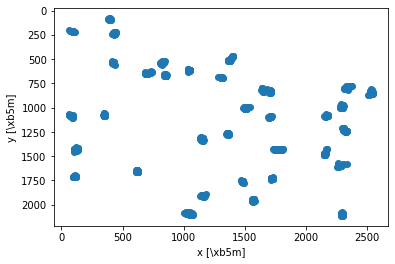

In [15]:
# tp.scatter(DataFrame, mpp, cmap, ax-matplotlib axes object, pos_columns-column names)
# 4.31pix/um = 0.23201 um/pix
scatter_M1 = tp.scatter(tM1, mpp=0.23201)
scatter_M2 = tp.scatter(tM2, mpp=0.23201)

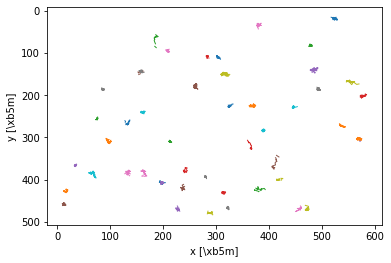

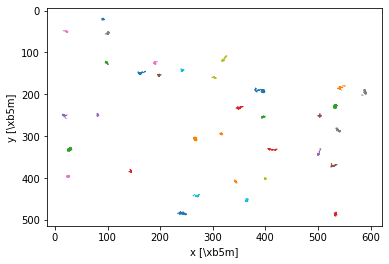

In [16]:
# trackpy.plot_traj(traj, colorby='particle', mpp=None, 
# label=False, superimpose=None, cmap=None, ax=None, t_column=None, pos_columns=None, 
# plot_style={}, **kwargs)

traj_plotting_M1 = tp.plot_traj(tM1, mpp=0.23201)
trak_plotting_M2 = tp.plot_traj(tM2, mpp=0.23201)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020243F5F388>,
      dtype=object)

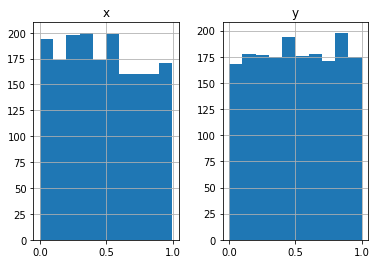

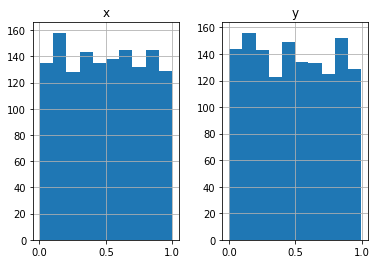

In [17]:
# Histogram the fractional part of the x and y position.
# trackpy.subpx_bias(DataFrame, pos_columns=None)

# If subpixel accuracy is good, this should be flat. 
# If it depressed in the middle, try using a larger value for feature diameter.

tp.subpx_bias(tM1)
tp.subpx_bias(tM2)

# we can see from results that the lines are flat, which is a sign of good accuracy

In [18]:
pd.set_option('display.max_rows', None)
tM1

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,67.996313,2271.672659,123140.412683,29.537323,0.189178,87.864169,361345.0,0.011629,0,0
0,1324.176773,436.992234,197599.194331,31.353567,0.088179,134.236925,475117.0,0.008006,0,3
0,1330.753493,923.224930,168879.204219,28.334537,0.094587,139.118268,416606.0,0.009533,0,4
0,1399.987163,1579.601325,172487.736831,24.884501,0.040956,140.948771,418040.0,0.009489,0,6
0,1575.108466,148.229949,120468.487706,29.461347,0.082075,81.152323,364006.0,0.011507,0,7
0,1603.060382,1764.203973,171967.873831,24.978526,0.036836,127.525079,484356.0,0.007809,0,8
0,1633.309996,585.403662,196360.553614,29.217345,0.037920,148.880953,497485.0,0.007544,0,12
0,1684.556651,1201.155349,188342.338014,31.697105,0.062949,137.897932,505319.0,0.007395,0,13
0,1711.941386,1822.384756,165298.739327,26.106464,0.086779,100.067526,536172.0,0.006859,0,14


In [91]:
# want DF to have columns in order
# ID | Frame | x[um] | y[um] | t[sec]
df1 = tM1.rename(columns = {'frame': 'frame#'})
df1 = df1[['particle','frame#','x', 'y']].copy()

df2 = tM2.rename(columns = {'frame': 'frame#'})
df2 = df2[['particle','frame#','x', 'y']].copy()

In [87]:
# Visualizing the data by particle, frame
# particle0 = df1.loc[df1['particle']==0]

In [100]:
# making my own function to plot relative trajectories
def relativeTrajectories(df, ids, name_df):
    rows = []
    for i in ids:
        xvals = []
        yvals = []
        
        xdatum = 0
        ydatum = 0
        for j,k in df.iterrows():
            if k['particle'] == i:
                if xdatum == 0:
                    xdatum = k['x']
                    ydatum = k['y']
                # dataframe for results if needed
                rows.append([k['particle'], k['frame#'], k['x']-xdatum, k['y']-ydatum])
                # for plots
                xvals.append(k['x']-xdatum)
                yvals.append(k['y']-ydatum)
        # creating new tractory
        plt.plot(xvals, yvals)
    plt.xlabel("x[um]")
    plt.ylabel("y[um]")
    plt.title("Relative Trajectories-"+ name_df)
    plt.show()
    
    new = pd.DataFrame(rows, columns=['particle', 'frame', 'x', 'y'])
    return

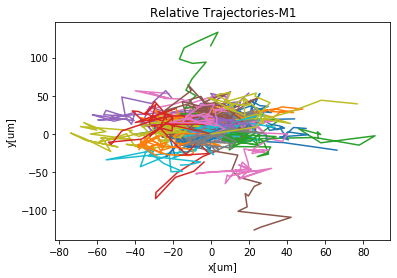

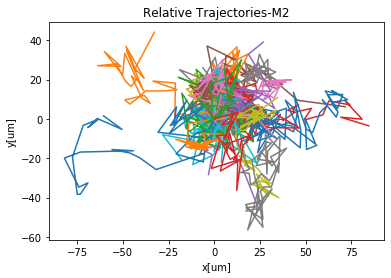

In [102]:
# Plotting relative trajectories
id_f1 = df1.particle.unique()
id_f2 = df2.particle.unique()

relativeTrajectories(df1, id_f1, "M1")
relativeTrajectories(df2, id_f2, "M2")

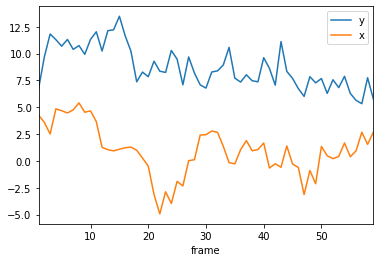

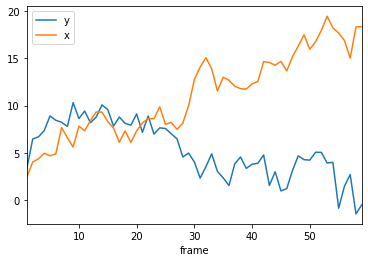

In [121]:
# compute_drift(traj, smoothing=0, pos_columns=['x','y'])
tp.compute_drift(tM1, 0).plot()
tp.compute_drift(tM2, 0).plot()

In [107]:
# ensemble mean squared displacement
# tp.emsd(traj, mpp, fps)
em1 = tp.emsd(tM1, 0.23201, 1/300)
em2 = tp.emsd(tM2, 0.23201, 1/300)

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

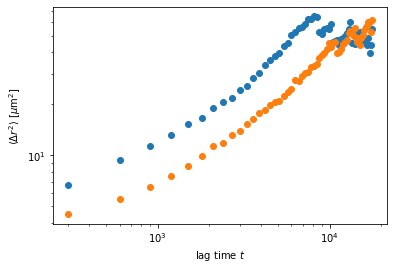

In [119]:
fig, ax = plt.subplots()
ax.plot(em1.index, em1, 'o', label="M1")
ax.plot(em2.index, em2, 'o', label="M2")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')